## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_json("https://www.mohfw.gov.in/data/datanew.json")

In [3]:
df.head()

,sno,state_name,active,positive,cured,death,new_active,new_positive,new_cured,new_death,death_reconsille,total,state_code,actualdeath24hrs
0,1,Andaman and Nicobar Islands,5,10747,10613,129,1,10747,10617,129,,,35,0
1,2,Andhra Pradesh,4,2339071,2324334,14733,4,2339073,2324336,14733,,,28,0
2,3,Arunachal Pradesh,1,66891,66594,296,1,66891,66594,296,,,12,0
3,4,Assam,0,746100,738065,8035,0,746100,738065,8035,,,18,0
4,5,Bihar,13,851404,839088,12303,10,851404,839091,12303,,,10,0


In [4]:
df.tail()

,sno,state_name,active,positive,cured,death,new_active,new_positive,new_cured,new_death,death_reconsille,total,state_code,actualdeath24hrs
32,33,Tripura,0,108034,107094,940,0,108034,107094,940,,,16,0
33,34,Uttarakhand,33,449416,441630,7753,34,449417,441630,7753,,,5,0
34,35,Uttar Pradesh,39,2128134,2104462,23633,29,2128139,2104476,23634,,1,9,1
35,36,West Bengal,59,2118644,2097053,21532,57,2118647,2097058,21532,,,19,0
36,37,,2503,44680771,44146330,530716,2509,44680985,44146534,530718,2,4,0,2


In [5]:
df=df.iloc[:-1,:]

In [6]:
df.tail()

,sno,state_name,active,positive,cured,death,new_active,new_positive,new_cured,new_death,death_reconsille,total,state_code,actualdeath24hrs
31,32,Telangana,62,841392,837219,4111,62,841401,837228,4111,,,36,0
32,33,Tripura,0,108034,107094,940,0,108034,107094,940,,,16,0
33,34,Uttarakhand,33,449416,441630,7753,34,449417,441630,7753,,,5,0
34,35,Uttar Pradesh,39,2128134,2104462,23633,29,2128139,2104476,23634,,1,9,1
35,36,West Bengal,59,2118644,2097053,21532,57,2118647,2097058,21532,,,19,0


## Performing exploratory analysis

In [7]:
print("Columns are : ")
for i in df.columns:
    print("\t",i," ,")

Columns are : 
	 sno  ,
	 state_name  ,
	 active  ,
	 positive  ,
	 cured  ,
	 death  ,
	 new_active  ,
	 new_positive  ,
	 new_cured  ,
	 new_death  ,
	 death_reconsille  ,
	 total  ,
	 state_code  ,
	 actualdeath24hrs  ,


In [8]:
df["state_name"].value_counts().sum()

36

In [9]:
state_counts= [i for i in range(len(df["state_name"]))]

In [10]:
import matplotlib.pyplot as plt

<AxesSubplot: >

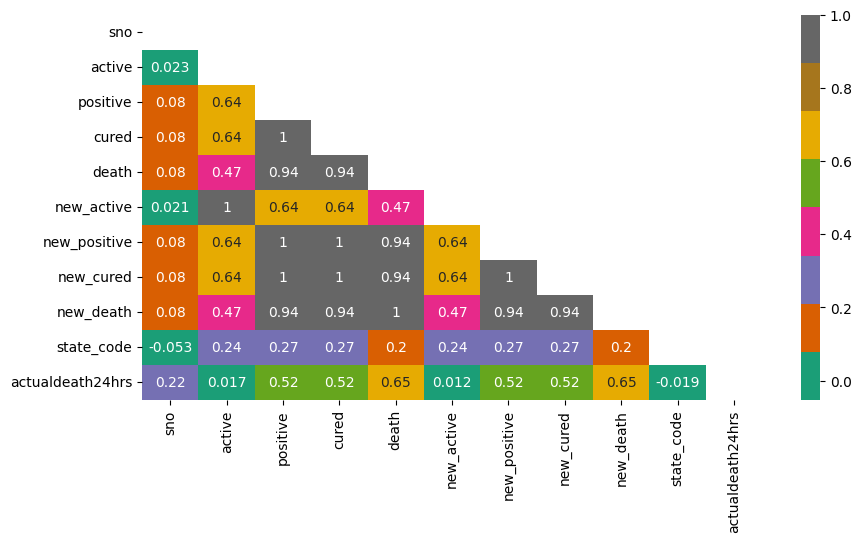

In [11]:
plt.figure(figsize=(10,5))
mask = np.triu(np.ones_like(df.corr(),dtype=bool))
sns.heatmap(df.corr(),mask=mask,annot=True,cmap='Dark2')

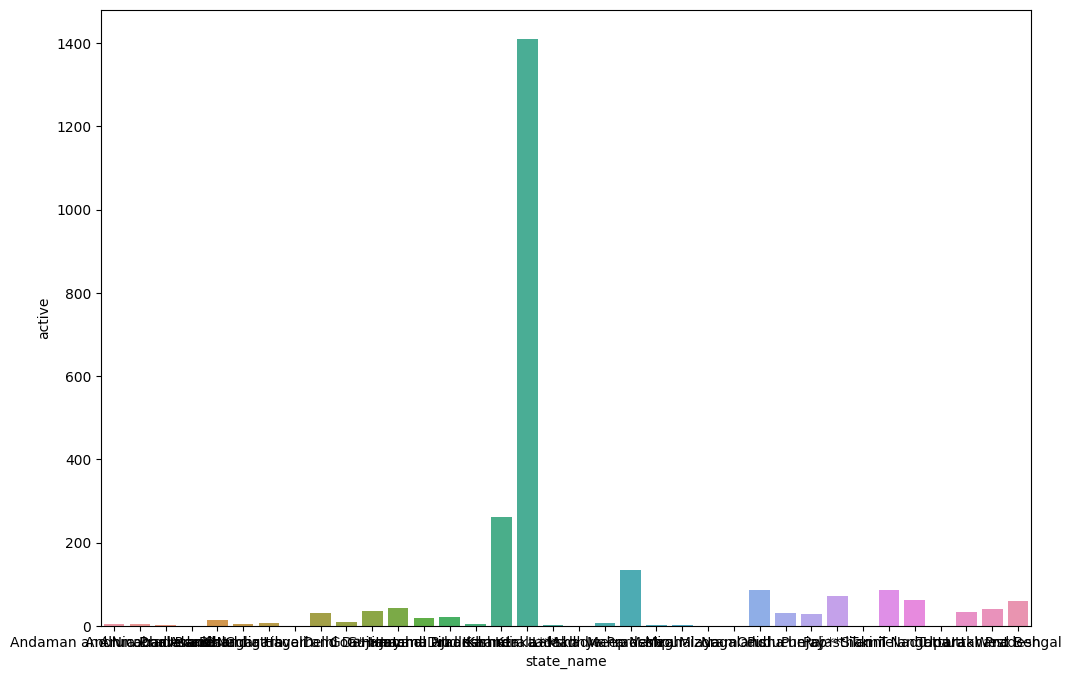

In [12]:
plt.figure(figsize=(12,8))
sns.barplot(x=df['state_name'],y=df['active'])
plt.savefig("state_name and active cases.png")

In [13]:
df.head()

,sno,state_name,active,positive,cured,death,new_active,new_positive,new_cured,new_death,death_reconsille,total,state_code,actualdeath24hrs
0,1,Andaman and Nicobar Islands,5,10747,10613,129,1,10747,10617,129,,,35,0
1,2,Andhra Pradesh,4,2339071,2324334,14733,4,2339073,2324336,14733,,,28,0
2,3,Arunachal Pradesh,1,66891,66594,296,1,66891,66594,296,,,12,0
3,4,Assam,0,746100,738065,8035,0,746100,738065,8035,,,18,0
4,5,Bihar,13,851404,839088,12303,10,851404,839091,12303,,,10,0


In [14]:
df['state_in_number']=state_counts

In [15]:
df.head()

,sno,state_name,active,positive,cured,death,new_active,new_positive,new_cured,new_death,death_reconsille,total,state_code,actualdeath24hrs,state_in_number
0,1,Andaman and Nicobar Islands,5,10747,10613,129,1,10747,10617,129,,,35,0,0
1,2,Andhra Pradesh,4,2339071,2324334,14733,4,2339073,2324336,14733,,,28,0,1
2,3,Arunachal Pradesh,1,66891,66594,296,1,66891,66594,296,,,12,0,2
3,4,Assam,0,746100,738065,8035,0,746100,738065,8035,,,18,0,3
4,5,Bihar,13,851404,839088,12303,10,851404,839091,12303,,,10,0,4


In [16]:
state_dict = { k:v for (k,v) in zip(df['state_name'], state_counts)}

In [17]:
df.drop(['state_name'],axis=1,inplace=True)

In [18]:
df.head()

,sno,active,positive,cured,death,new_active,new_positive,new_cured,new_death,death_reconsille,total,state_code,actualdeath24hrs,state_in_number
0,1,5,10747,10613,129,1,10747,10617,129,,,35,0,0
1,2,4,2339071,2324334,14733,4,2339073,2324336,14733,,,28,0,1
2,3,1,66891,66594,296,1,66891,66594,296,,,12,0,2
3,4,0,746100,738065,8035,0,746100,738065,8035,,,18,0,3
4,5,13,851404,839088,12303,10,851404,839091,12303,,,10,0,4


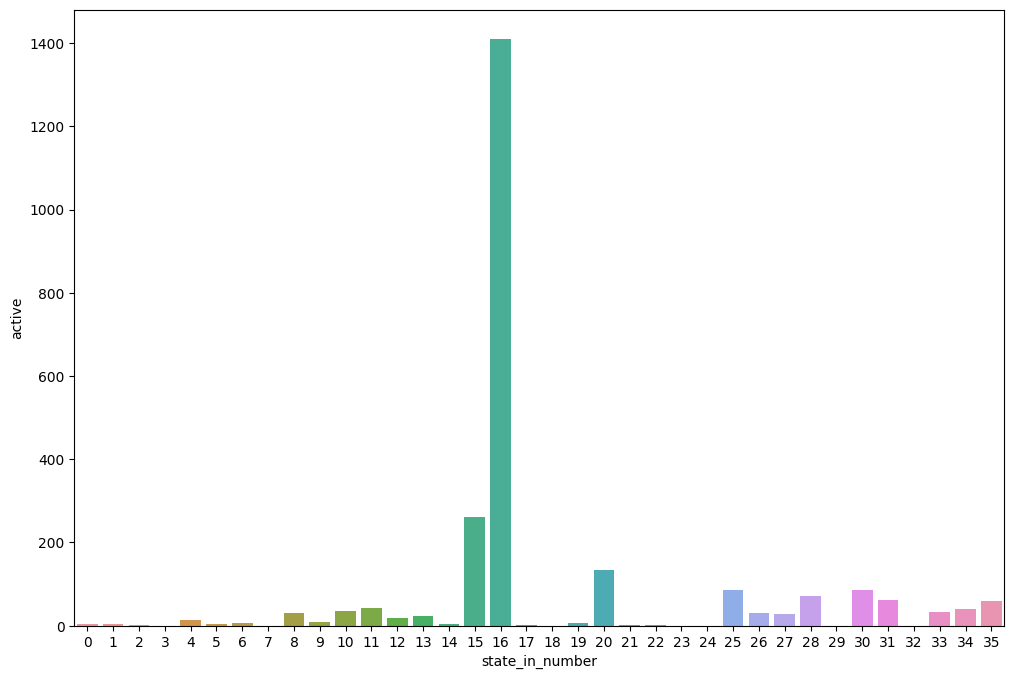

In [19]:
plt.figure(figsize=(12,8))
sns.barplot(x=df['state_in_number'],y=df['active'])
plt.savefig("state_name and active cases.png")

In [20]:
highest_state = [i for i in state_dict if state_dict[i]==16]
kerala = df['active'].loc[df["state_in_number"]==16]

In [21]:
print(highest_state," has highest case having state number ",df['active'].loc[df["state_in_number"]==16])

['Kerala***']  has highest case having state number  16    1410
Name: active, dtype: int64


In [22]:
plt.figure(figsize=(12,8))
state_comparing = ["active","positive","cured","death","new_active","new_positive","new_cured","new_death","actualdeath24hrs"]

<Figure size 1200x800 with 0 Axes>

## comparing every feature with states

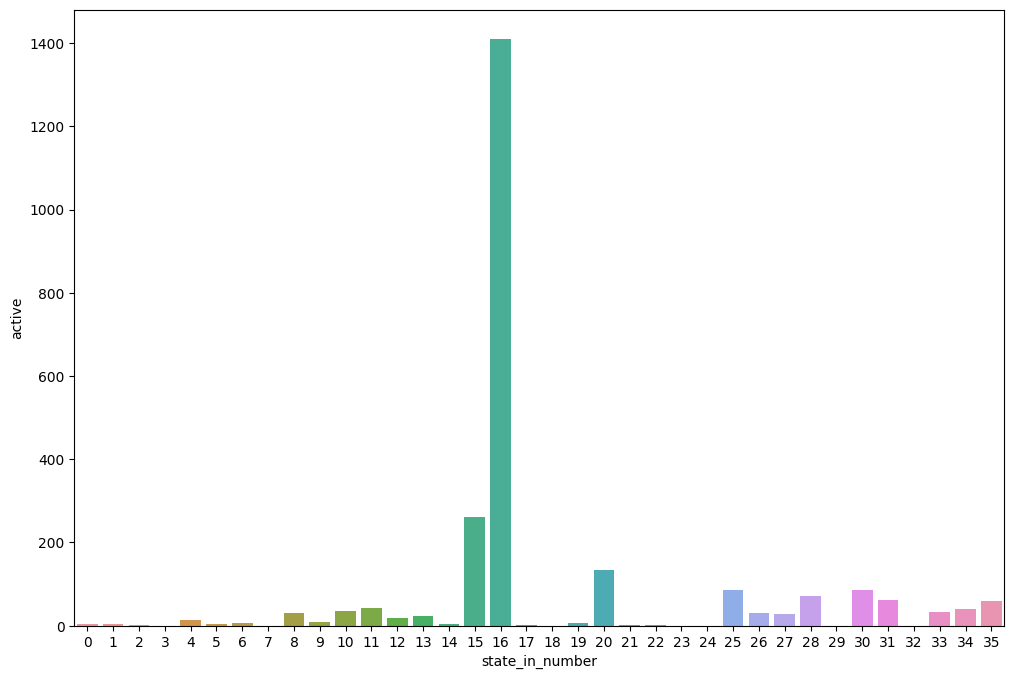

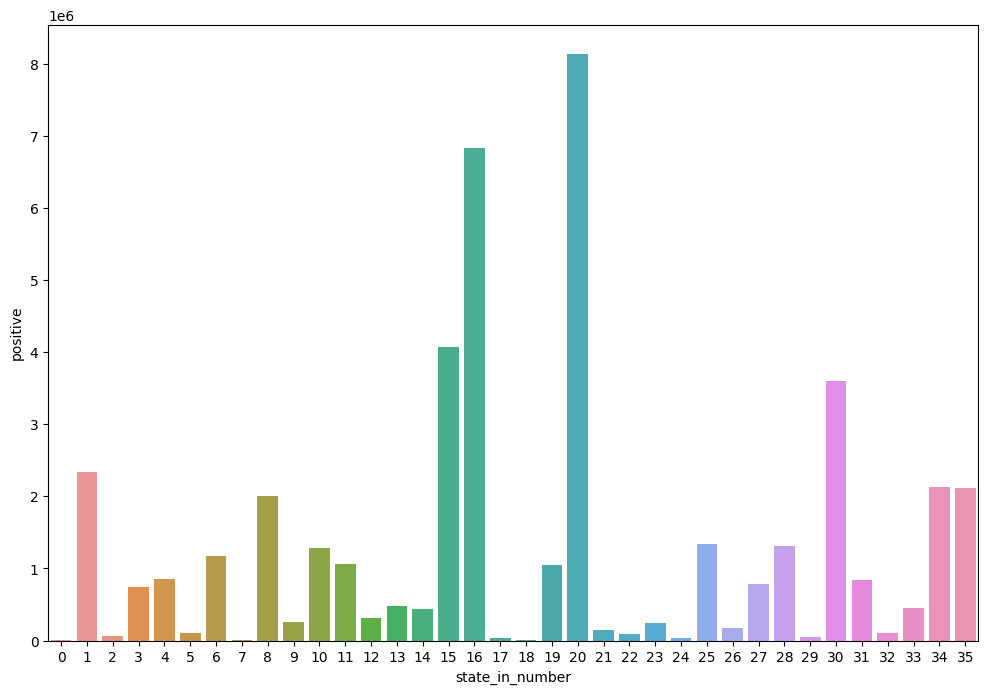

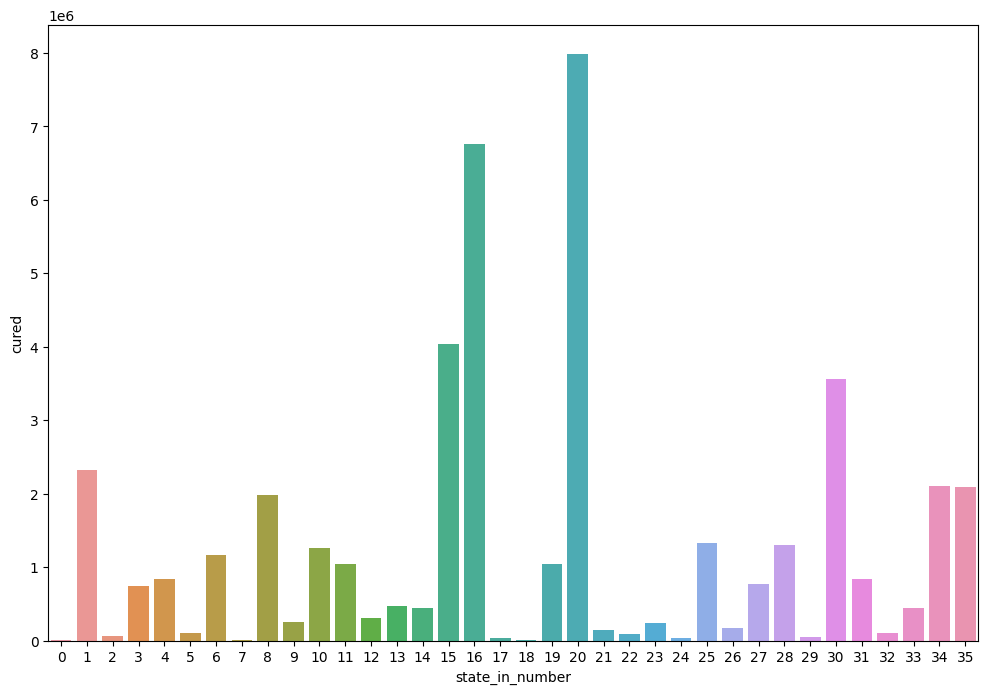

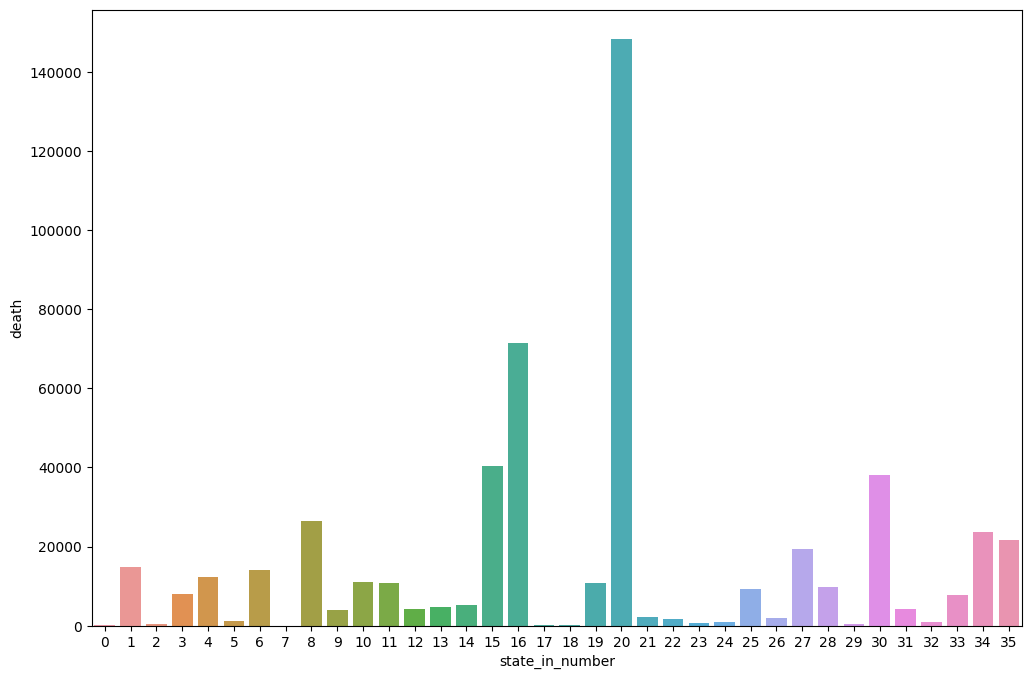

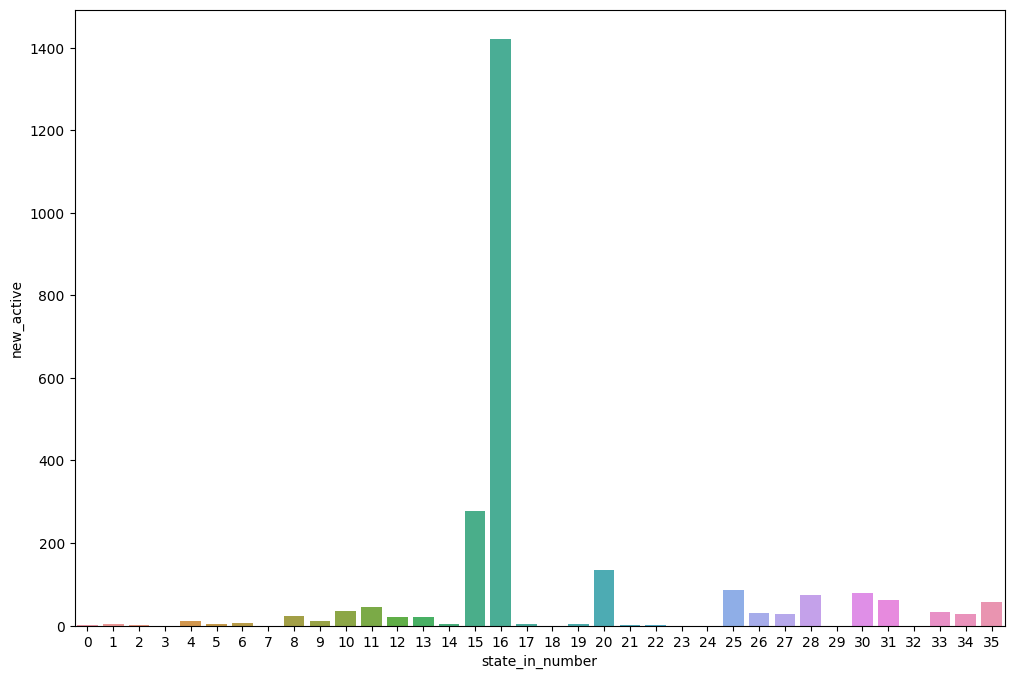

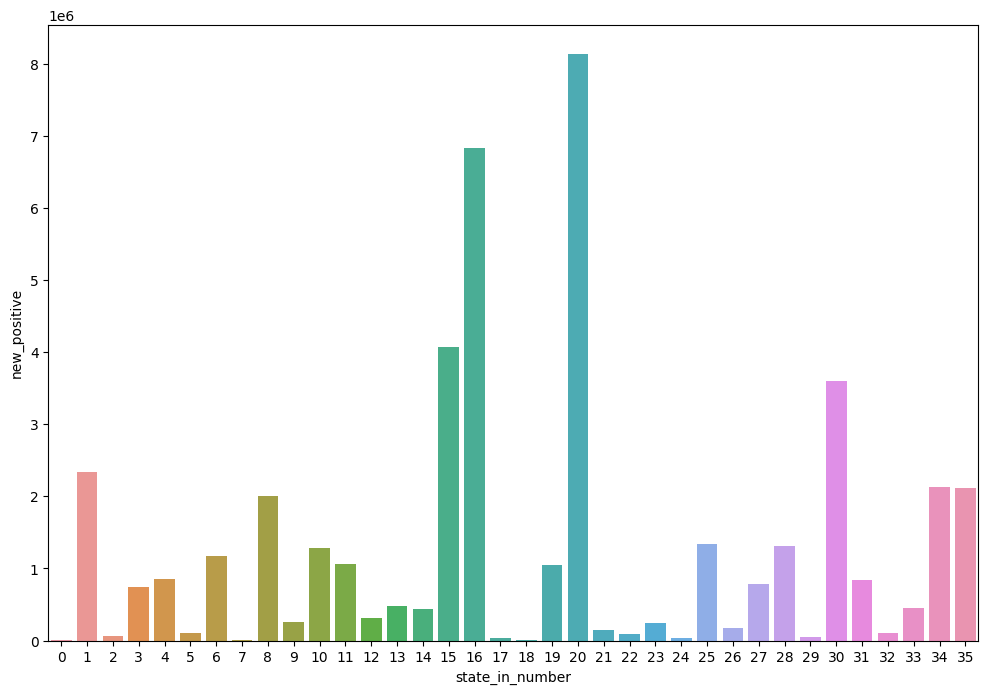

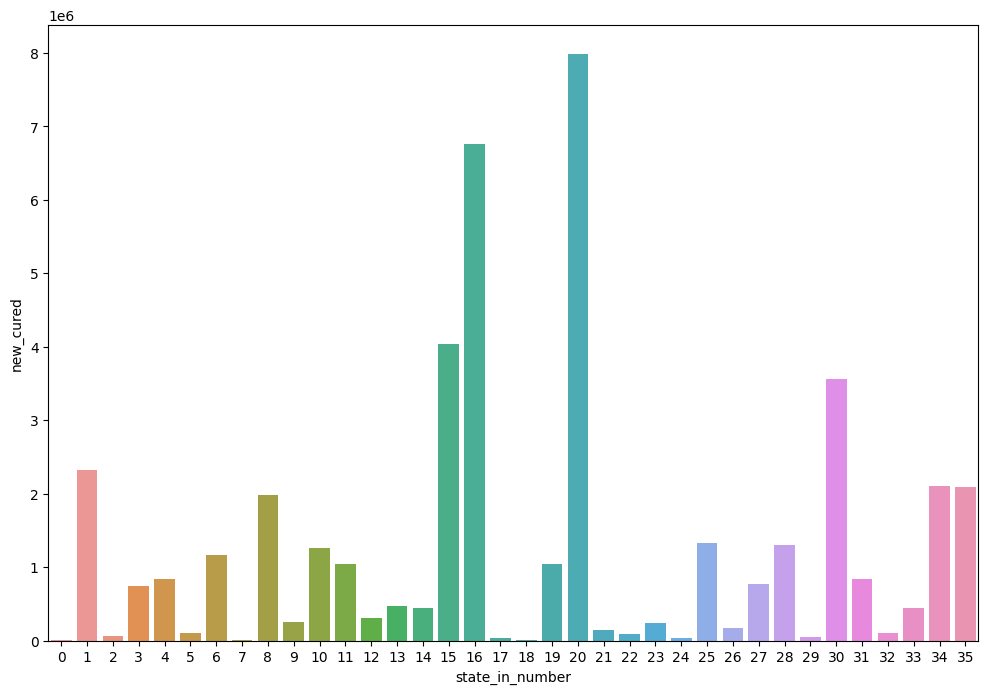

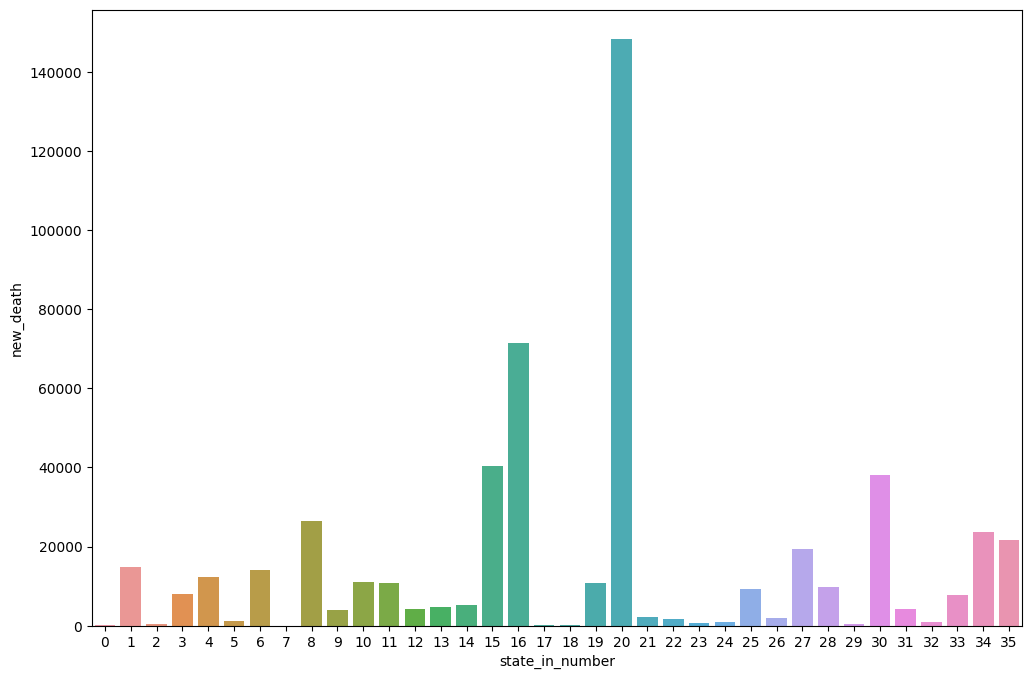

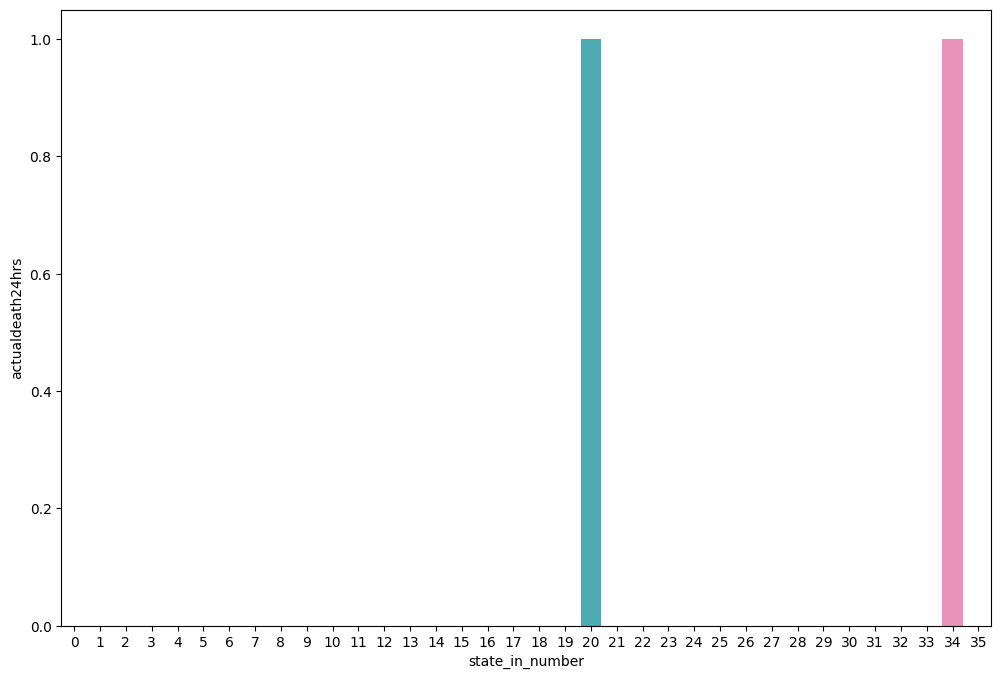

In [26]:
for i in state_comparing:
    plt.figure(figsize=(12,8))
    sns.barplot(x=df['state_in_number'],y=df[i])
    filename = "state_name_and_{}.png".format(i)
    plt.savefig(filename)
    plt.show()

In [27]:
state_dict

{'Andaman and Nicobar Islands': 0,
 'Andhra Pradesh': 1,
 'Arunachal Pradesh': 2,
 'Assam': 3,
 'Bihar': 4,
 'Chandigarh': 5,
 'Chhattisgarh': 6,
 'Dadra and Nagar Haveli and Daman and Diu': 7,
 'Delhi': 8,
 'Goa*': 9,
 'Gujarat': 10,
 'Haryana': 11,
 'Himachal Pradesh': 12,
 'Jammu and Kashmir': 13,
 'Jharkhand': 14,
 'Karnataka': 15,
 'Kerala***': 16,
 'Ladakh': 17,
 'Lakshadweep': 18,
 'Madhya Pradesh': 19,
 'Maharashtra': 20,
 'Manipur': 21,
 'Meghalaya': 22,
 'Mizoram': 23,
 'Nagaland': 24,
 'Odisha': 25,
 'Puducherry': 26,
 'Punjab**': 27,
 'Rajasthan': 28,
 'Sikkim': 29,
 'Tamil Nadu': 30,
 'Telangana': 31,
 'Tripura': 32,
 'Uttarakhand': 33,
 'Uttar Pradesh': 34,
 'West Bengal': 35}

In [30]:
states = [i for i in state_dict]

In [40]:
df.head()

,sno,active,positive,cured,death,new_active,new_positive,new_cured,new_death,death_reconsille,total,state_code,actualdeath24hrs,state_in_number
0,1,5,10747,10613,129,1,10747,10617,129,,,35,0,0
1,2,4,2339071,2324334,14733,4,2339073,2324336,14733,,,28,0,1
2,3,1,66891,66594,296,1,66891,66594,296,,,12,0,2
3,4,0,746100,738065,8035,0,746100,738065,8035,,,18,0,3
4,5,13,851404,839088,12303,10,851404,839091,12303,,,10,0,4


## Comparing all features with respective states

In [41]:
df["state"] =states

In [43]:
df = df.set_index('state',drop=True)

In [47]:
df = df.drop(['sno','state_in_number'],axis=1)

In [48]:
df.head()

,active,positive,cured,death,new_active,new_positive,new_cured,new_death,death_reconsille,total,state_code,actualdeath24hrs
state,,,,,,,,,,,,
Andaman and Nicobar Islands,5,10747,10613,129,1,10747,10617,129,,,35,0
Andhra Pradesh,4,2339071,2324334,14733,4,2339073,2324336,14733,,,28,0
Arunachal Pradesh,1,66891,66594,296,1,66891,66594,296,,,12,0
Assam,0,746100,738065,8035,0,746100,738065,8035,,,18,0
Bihar,13,851404,839088,12303,10,851404,839091,12303,,,10,0


<AxesSubplot: ylabel='state'>

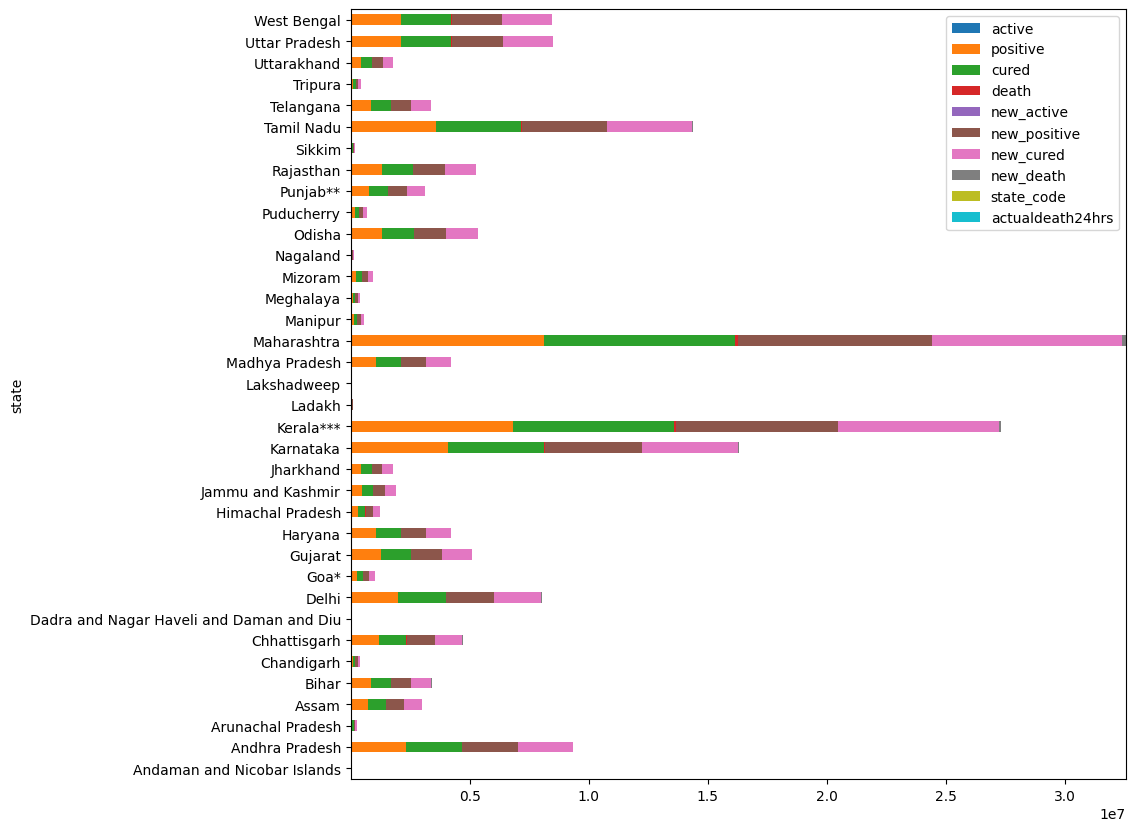

In [49]:
df.plot.barh(stacked = True,figsize=(10,10))

<AxesSubplot: ylabel='state'>

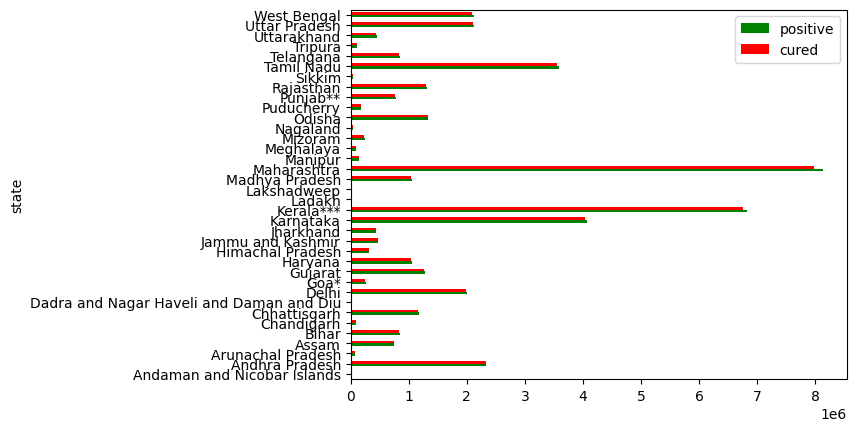

In [57]:
df_temp = df.iloc[:,1:3]
df_temp.plot.barh(color={"cured" : "red" , "positive":"green"})

In [ ]:
df_temp = df.iloc[:,]
df_temp.plot.barh(color={"cured" : "red" , "positive":"green"})